In [58]:
%matplotlib inline
from __future__ import division
import pandas as pd
import matplotlib
matplotlib.rcParams['figure.figsize'] = (16,12)
import matplotlib.pyplot as plt
import itertools
import numpy as np


def run():
    N = 1000
    N_iterations = 100
    chrom_length = 3*(10**9)
    transposon_length = 3*1000
    mu = 0.05
    t_positions = []

    n_initial = np.random.random_integers(N-1)
    x_initial = np.random.random_integers(chrom_length-1)

    offspring_positions = []
    all_positions = [[] for t in range(N)]
    all_positions[n_initial].append(x_initial)
    all_t_count =[]

    for nn in range(N_iterations):
        for i in range(N):
            indicator = np.random.binomial(1,mu,len(all_positions[i]))
            temp_indices = []
            for ind, ind_value in enumerate(indicator):
                if ind_value == 1:
                    temp_indices.append(ind)

            for j in temp_indices:
                x_temp = np.random.random_integers(chrom_length-1)
                all_positions[i][j] = x_temp
                all_positions[i].append(np.random.random_integers(chrom_length-1))
        offspring_positions = [[] for t in range(N)]
        for j in range(N):
            y,z = np.random.random_integers(0,N-1,2)
            y_parent = np.random.binomial(1,0.5,len(all_positions[y]))
            z_parent = np.random.binomial(1,0.5,len(all_positions[z]))
            temp_y = []
            temp_z = []
            for index,value in enumerate(y_parent):
                if value==1:
                      temp_y.append(all_positions[y][index])
            for index,value in enumerate(z_parent):
                if value==1:
                      temp_z.append(all_positions[z][index])
            for t_y in temp_y:
                offspring_positions[j].append(t_y)
            for t_z in temp_z:
                offspring_positions[j].append(t_z)
        all_positions = offspring_positions
        count_t = 0
        count_x = []
        for p in range(N):
            count_t += len(all_positions[p])
            count_x.append(all_positions[p])
        survived_t = np.unique(count_x, return_counts=True)[1]
        all_t_count.append((count_t, len(survived_t[survived_t>=N*mu])))
    return all_t_count
    
    

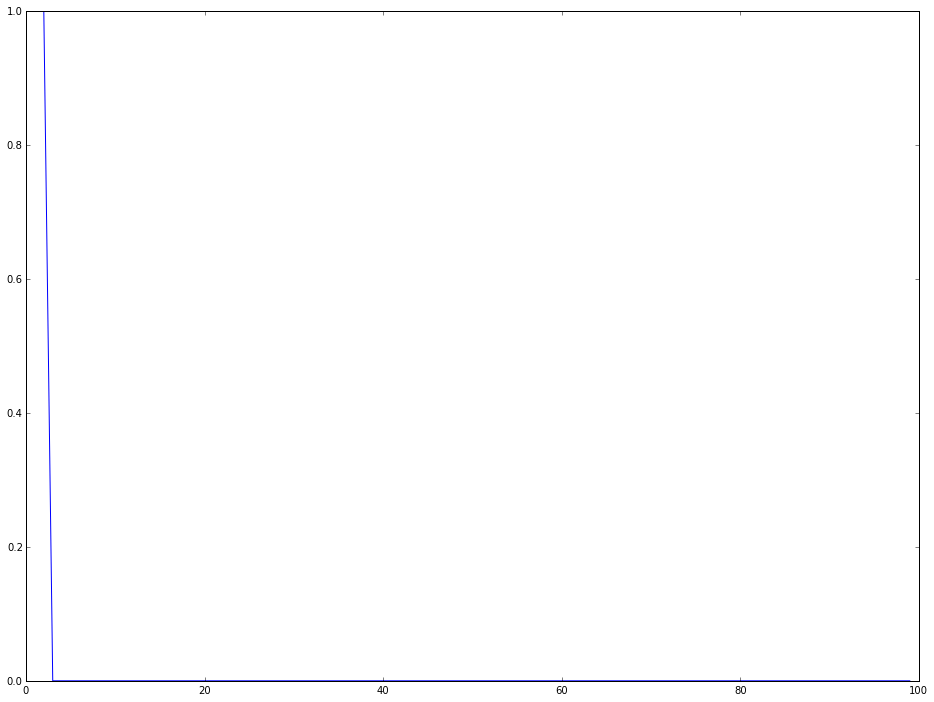

In [59]:
all_t_count = run()
plt.plot([x[0] for x in all_t_count])
plt.title('')
